In [8]:
from pathlib import Path
import numpy as np
import re

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB2'
demof = f'{demodir}/demographics.pkl'
fcdir = f'{demodir}/conn'

rest = []
work = []
restsubs = []
worksubs = []

for f in Path(fcdir).iterdir():
    rf = re.match('(.+)_task-20227-3_fc.npy', f.name)
    if rf:
        sub = rf.group(1)
        rest.append(np.load(f'{fcdir}/{sub}_task-20227-3_fc.npy'))
        restsubs.append(sub)
    wf = re.match('(.+)_task-20249-3_fc.npy', f.name)
    if wf:
        sub = wf.group(1)
        work.append(np.load(f'{fcdir}/{sub}_task-20249-3_fc.npy'))
        worksubs.append(sub)

rest = np.stack(rest)
work = np.stack(work)

# print(list(demo.keys()))

print([a.shape for a in [rest, work]])

[(2867, 34716), (2576, 34716)]


In [19]:
# Jitter Only

def mat2vec(mat):
    a,b = np.triu_indices(264,1)
    return mat[:,a,b]

fc = work

a,b = np.triu_indices(264,1)
X = np.ones((fc.shape[0],264,264))
X[:,a,b] = fc
X[:,b,a] = fc
w, v = np.linalg.eig(X)
print('Done eigs')

w[:,20:] = 0
aps20 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps20 = mat2vec(aps20)
print('Done 20')

w[:,15:] = 0
aps15 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps15 = mat2vec(aps15)
print('Done 15')

w[:,10:] = 0
aps10 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps10 = mat2vec(aps10)
print('Done 10')

w[:,5:] = 0
aps5 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps5 = mat2vec(aps5)
print('Done 5')

w[:,3:] = 0
aps3 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps3 = mat2vec(aps3)
print('Done 3')

w[:,1:] = 0
aps1 = np.real(np.einsum('nab,nb,ncb->nac',v,w,v))
aps1 = mat2vec(aps1)
print('Done 1')

w = None
v = None
X = None

Done eigs
Done 20
Done 15
Done 10
Done 5
Done 3
Done 1


In [20]:
# Save work

ukbdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/UKB'
task = '20249-3'

for i,sub in enumerate(worksubs):
    np.save(f'{ukbdir}/Top20/{sub}_task-{task}-top20_fc.npy', aps20[i])
    np.save(f'{ukbdir}/Top15/{sub}_task-{task}-top15_fc.npy', aps15[i])
    np.save(f'{ukbdir}/Top10/{sub}_task-{task}-top10_fc.npy', aps10[i])
    np.save(f'{ukbdir}/Top5/{sub}_task-{task}-top5_fc.npy', aps5[i])
    np.save(f'{ukbdir}/Top3/{sub}_task-{task}-top3_fc.npy', aps3[i])
    np.save(f'{ukbdir}/Top1/{sub}_task-{task}-top1_fc.npy', aps1[i])
    if i%100 == 0:
        print(f'Done {i}')

print('Complete')

Done 0
Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Done 1300
Done 1400
Done 1500
Done 1600
Done 1700
Done 1800
Done 1900
Done 2000
Done 2100
Done 2200
Done 2300
Done 2400
Done 2500
Complete


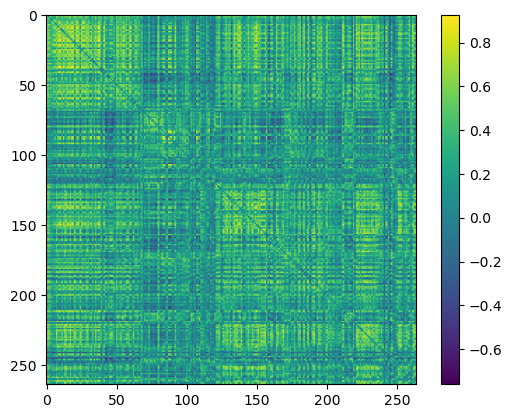

In [23]:
import matplotlib.pyplot as plt

def vec2mat(vec):
    a,b = np.triu_indices(264,1)
    mat = np.zeros((264,264))
    mat[a,b] = vec
    mat[b,a] = vec
    return mat

plt.imshow(vec2mat(aps20[1]))
plt.colorbar()
plt.show()